In [1]:
from utils import *
import matplotlib.pyplot as plt

In [2]:
# Import lamdareference.dat
import pandas as pd

lambda_ref = pd.read_csv('test/lambdareference.dat', sep='\s+')

coord2lambda_dict = coord2lambdaid('test/lambdareference.dat')

# Overview lambda distributions

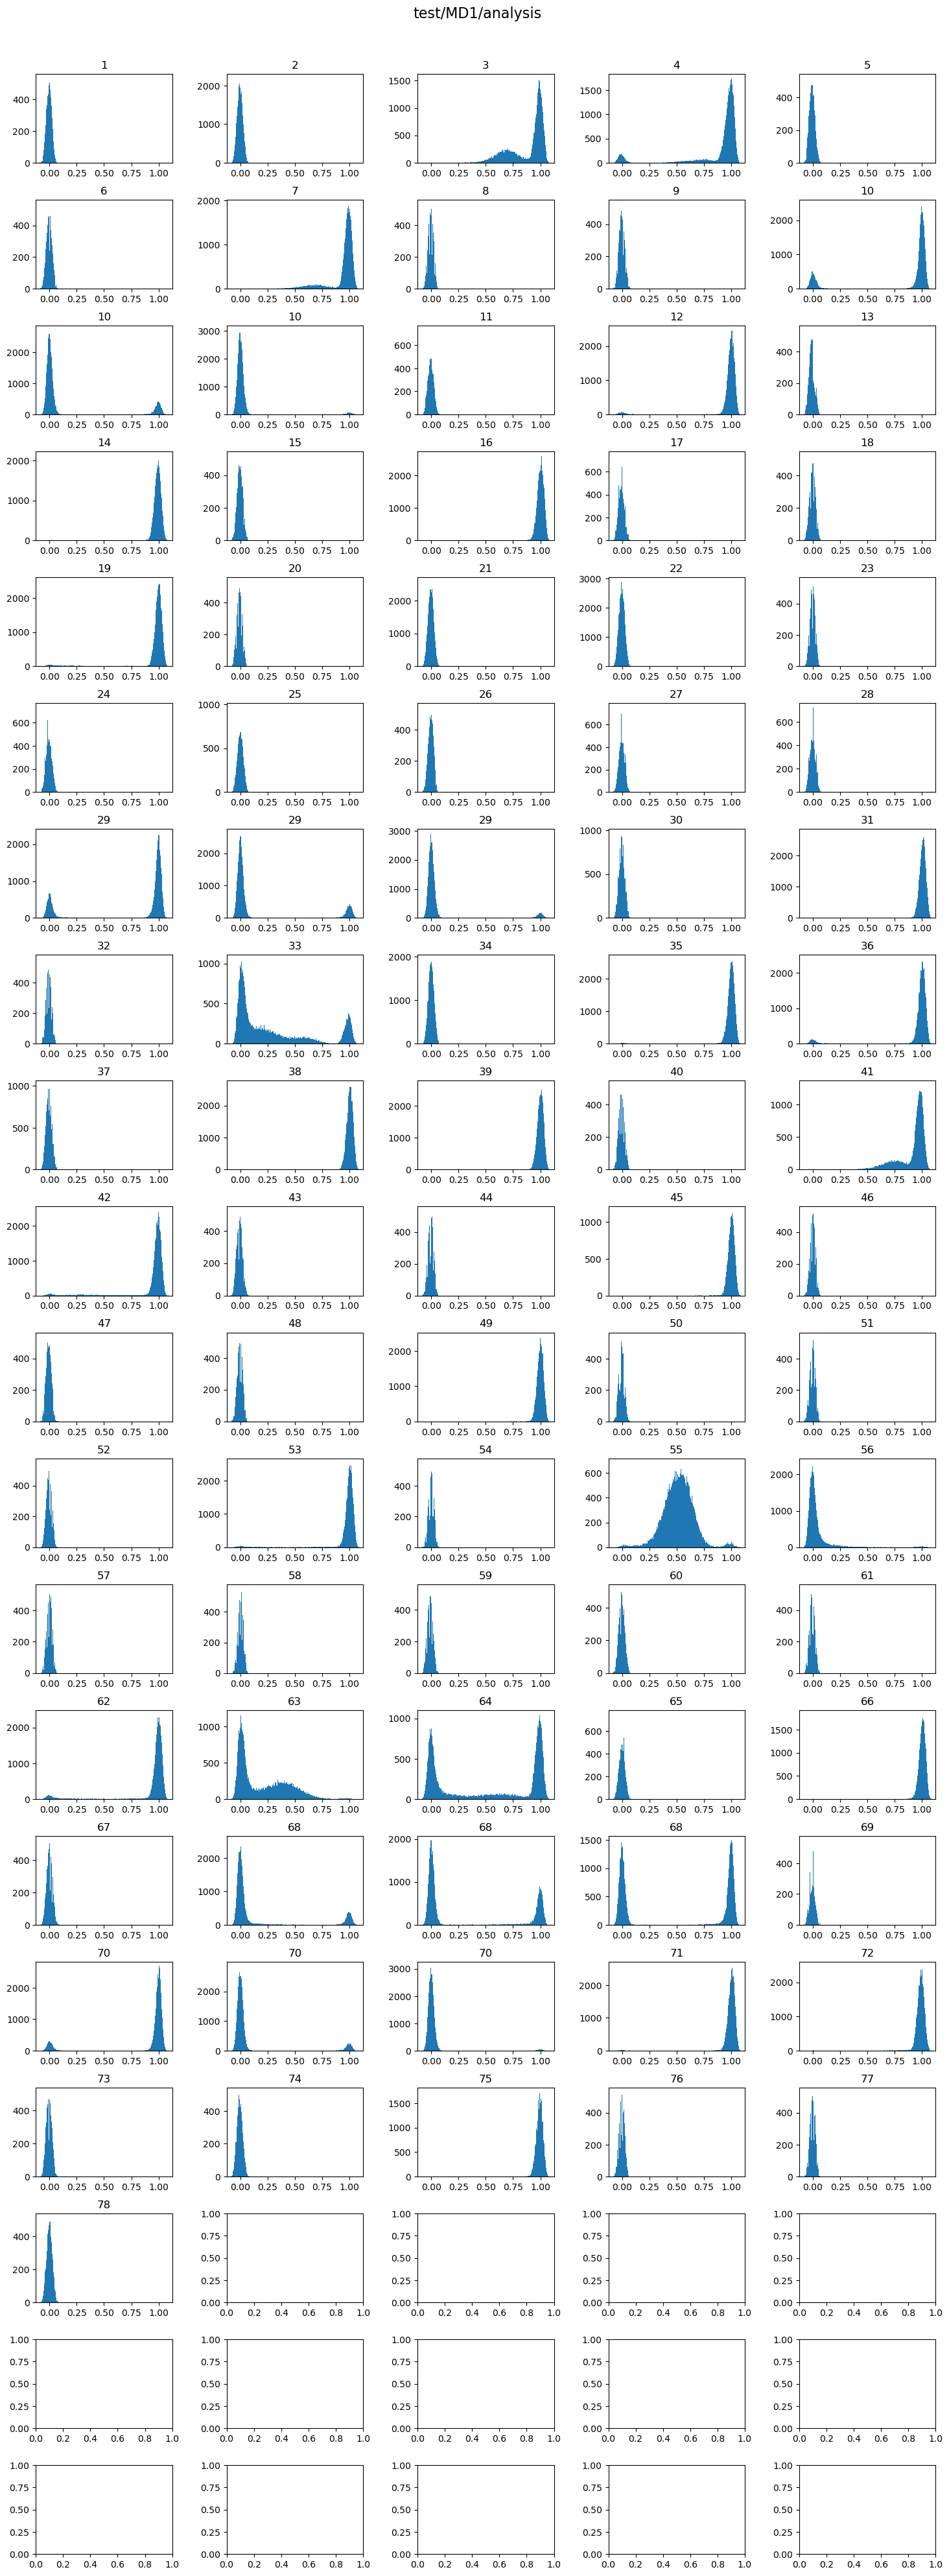

In [3]:
PATH_ANALYSIS = "test/MD1/analysis"

# Set up the grid size
rows = 20  # 10x10 grid for 100 plots
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 40))  # Adjusted figure size for 5x20 layout

coordid = 1
prv_resid = 0

# Generate and plot data for each subplot
fig.suptitle(PATH_ANALYSIS, fontsize=16, y=0.995)  # Moved suptitle up
fig.tight_layout(rect=[0, 0, 1, 0.99], pad=2.0)  # Adjust layout to leave space for suptitle

for i in range(rows):
    for j in range(cols):
        index = coordid-1
        #print(f"Coordid {coordid}")

        if index < lambda_ref.shape[0]:
            ax = axes[i, j]
            data = read_coordxvg(str(coordid), PATH_ANALYSIS)
            ax.hist(data[:,1], bins=1000);

            ax.set_xlim(-0.125,1.125)
            ax.set_title(f'{coord2lambda_dict[coordid]}')

        else:
             continue
        
        coordid += 1

# Show the plot
plt.show()

# Overview protonation fractions

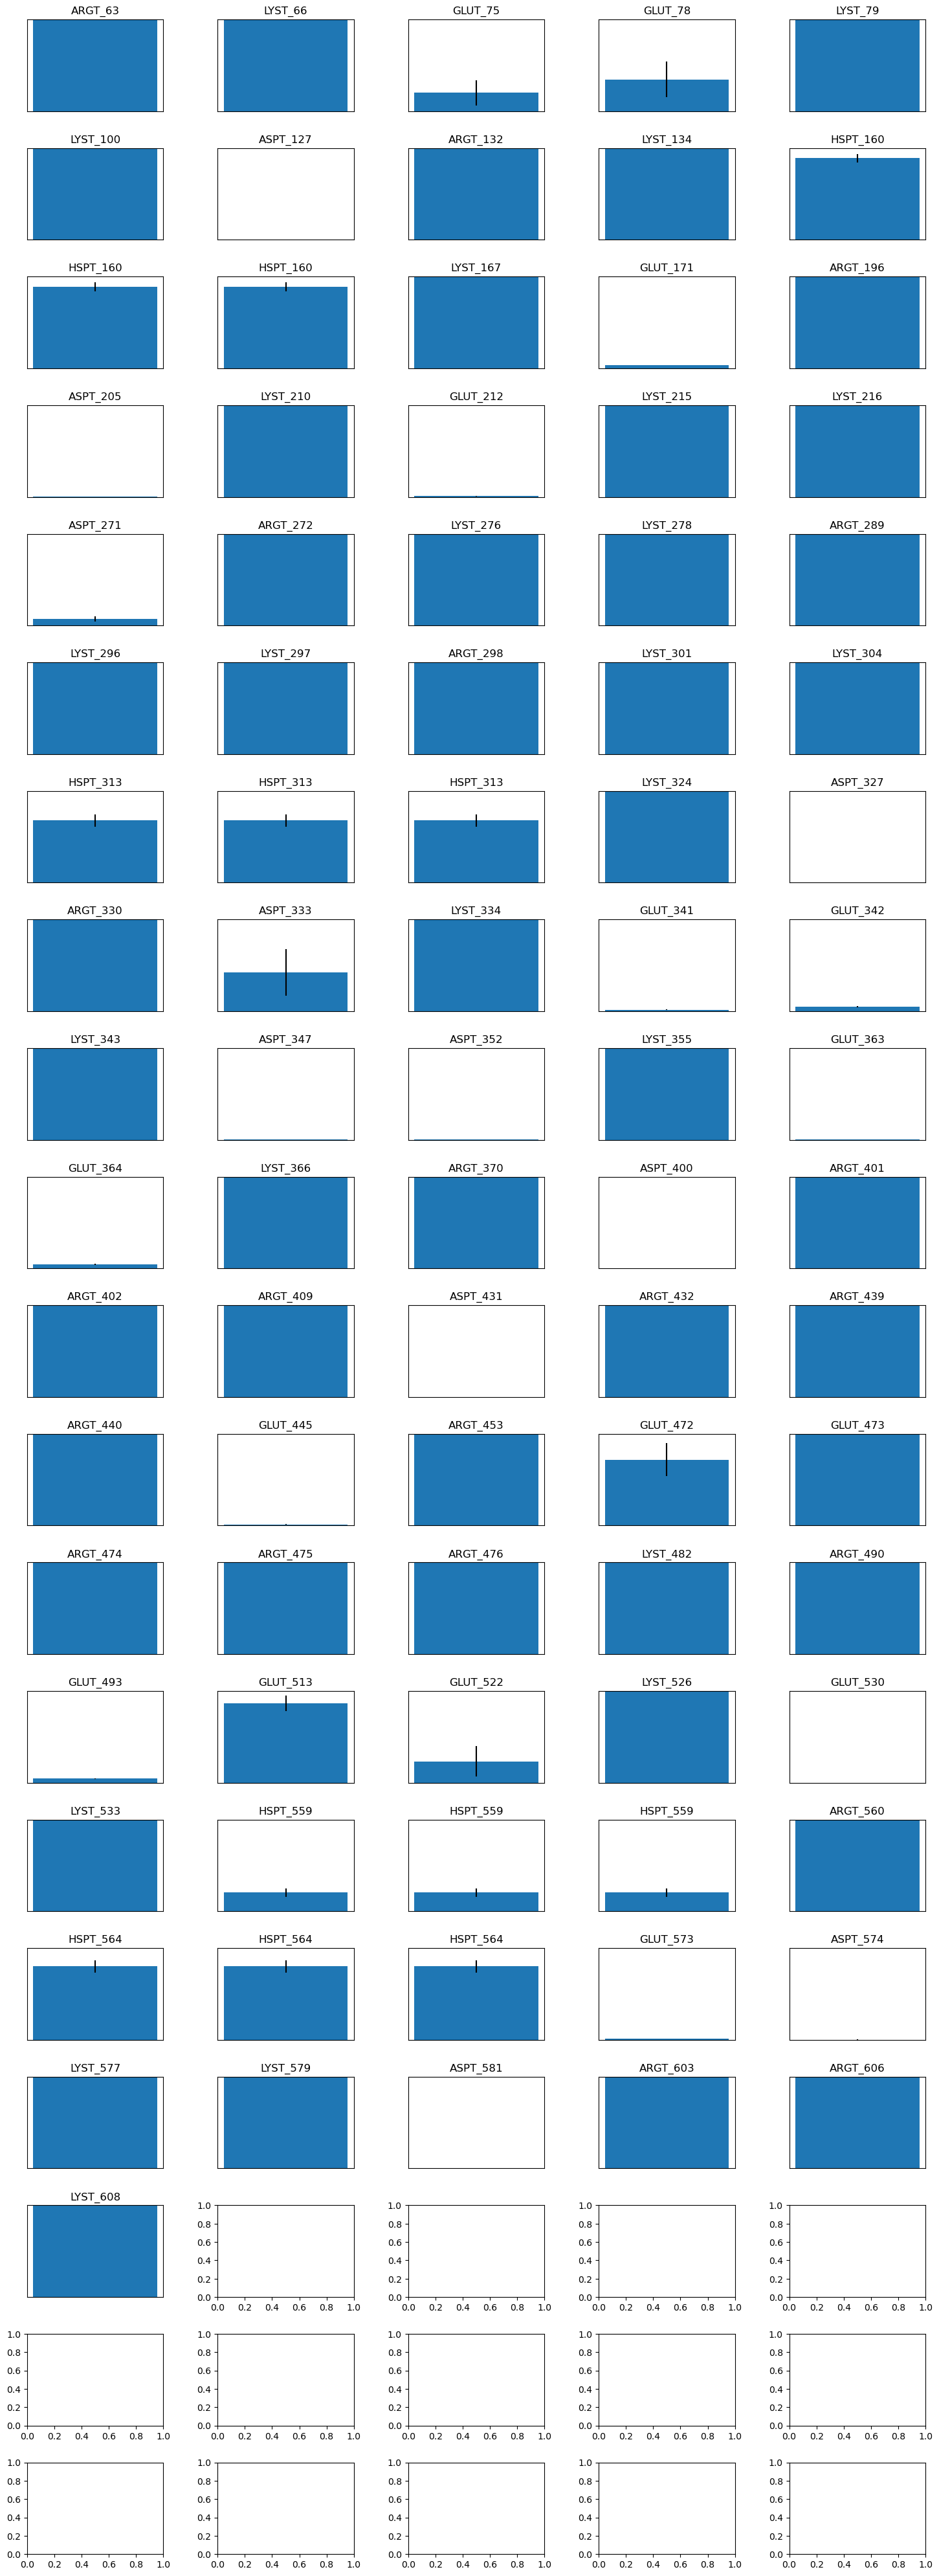

In [4]:
PATH_ANALYSIS = ["test/MD1/analysis", "test/MD1_2/analysis"]

# Set up the grid size
rows = 20  # 10x10 grid for 100 plots
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 40))  # Adjusted figure size for 5x20 layout
fig.tight_layout(pad=2.0)  # Optional: adjust padding between plots

coordid = 1
prv_resid = 0



# Generate and plot data for each subplot
for i in range(rows):
    for j in range(cols):
        index = coordid-1
        #print(f"Coordid {coordid}")

        if index < lambda_ref.shape[0]:
            ax = axes[i, j]
            
            # Generate some data; here, we're using sine waves with different frequencies

            if lambda_ref.iloc[index]['resname'] == "HSPT": #If histidine
                    if lambda_ref.iloc[index]['resid'] != prv_resid: #If this is histidine lambda1
                            
                        coordids = [coordid, coordid+1, coordid+2]
                        
                        proton_avg, proton_se = get_HISstats(coordids, PATH_ANALYSIS)

                        prv_resid = lambda_ref.iloc[index]['resid'] 
                    else:
                        proton_avg, proton_se = get_HISstats(coordids, PATH_ANALYSIS)

            else:
                proton_avg, deproton_avg, proton_se, deproton_se  = get_stats(str(coordid), PATH_ANALYSIS)


            ax.bar(['Protonated'], [proton_avg], yerr=proton_se)


            ax.set_ylim(0,1)
            ax.set_title(f'{lambda_ref.iloc[coordid-1]["resname"]}_{lambda_ref.iloc[coordid-1]["resid"]}')

            ax.set_xticks([])
            ax.set_yticks([])
        else:
             continue

        
        coordid += 1

# Show the plot
plt.show()

# Protonation fraction time series

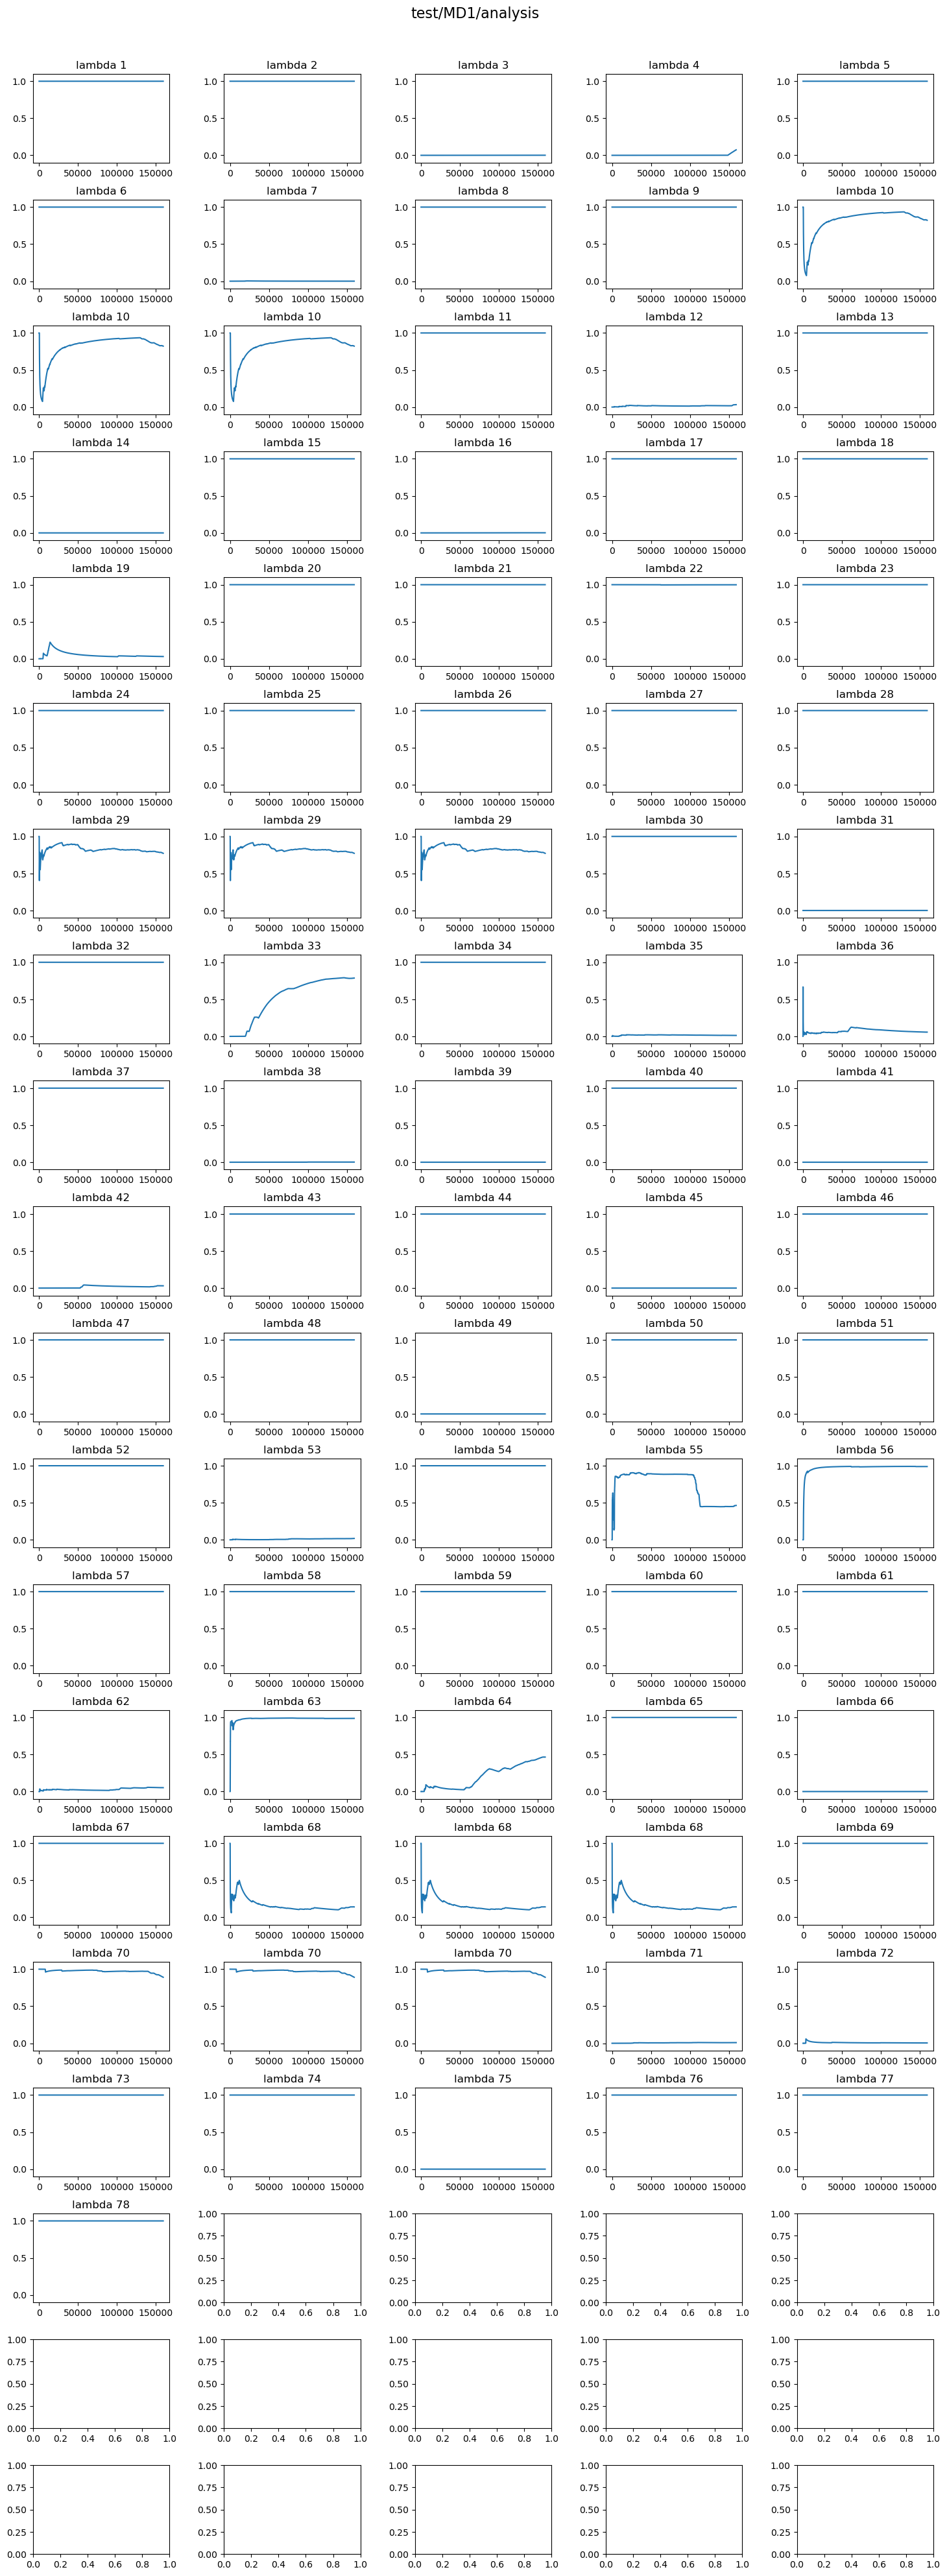

In [5]:
PATH_ANALYSIS = "test/MD1/analysis"

# Set up the grid size
rows = 20  # 10x10 grid for 100 plots
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 40))  # Adjusted figure size for 5x20 layout

coordid = 1
prv_resid = 0

# Generate and plot data for each subplot
fig.suptitle(PATH_ANALYSIS, fontsize=16, y=0.995)  # Moved suptitle up
fig.tight_layout(rect=[0, 0, 1, 0.99], pad=2.0)  # Adjust layout to leave space for suptitle

for i in range(rows):
    for j in range(cols):
        index = coordid-1
        #print(f"Coordid {coordid}")

        if index < lambda_ref.shape[0]:
            ax = axes[i, j]
            
            if lambda_ref.iloc[index]['resname'] == "HSPT": #If histidine
                    if lambda_ref.iloc[index]['resid'] != prv_resid: #If this is histidine lambda1
                            
                        coordids = [coordid, coordid+1, coordid+2]
                        
                        res_prot_ts = get_HISprotfrac_ts(coordids, PATH_ANALYSIS)

                        prv_resid = lambda_ref.iloc[index]['resid'] 
                    else:
                        res_prot_ts = get_HISprotfrac_ts(coordids, PATH_ANALYSIS)

            else:
                res_prot_ts = get_protfrac_ts(coordid, PATH_ANALYSIS)

            ax.plot(res_prot_ts, label="MD1")
            ax.set_ylim(-0.1,1.1)
            ax.set_title(f'lambda {coord2lambda_dict[coordid]}')

        else:
             continue
        
        coordid += 1

# Show the plot
plt.show()

# Check overall convergence between replicas
Just two replicas supported - add get_protfrac_ts if more than 2


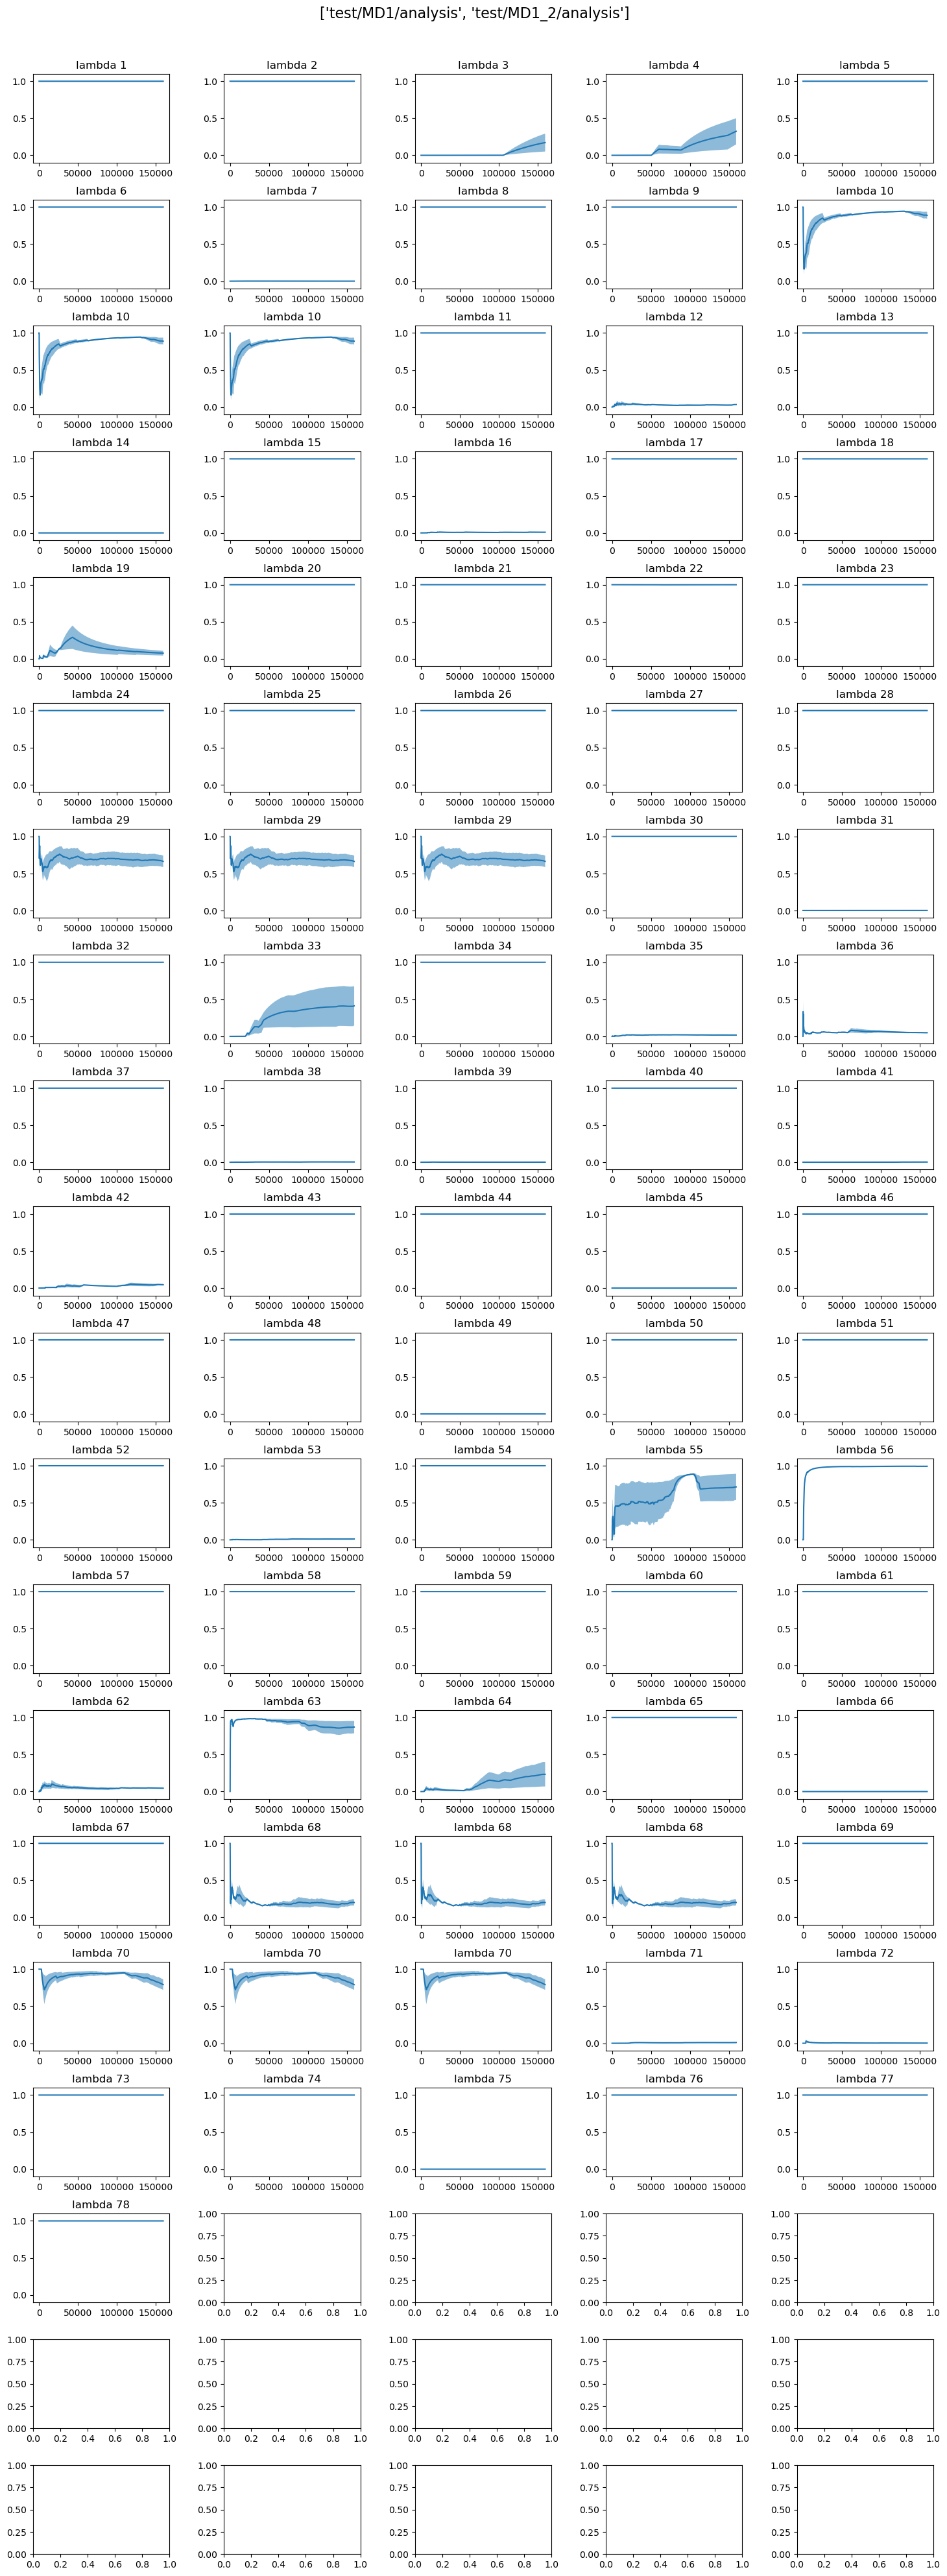

In [7]:
PATH_ANALYSIS = ["test/MD1/analysis", "test/MD1_2/analysis"]

# Set up the grid size
rows = 20  # 10x10 grid for 100 plots
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 40))  # Adjusted figure size for 5x20 layout

coordid = 1
prv_resid = 0

# Generate and plot data for each subplot
fig.suptitle(PATH_ANALYSIS, fontsize=16, y=0.995)  # Moved suptitle up
fig.tight_layout(rect=[0, 0, 1, 0.99], pad=2.0)  # Adjust layout to leave space for suptitle

for i in range(rows):
    for j in range(cols):
        index = coordid-1
        #print(f"Coordid {coordid}")

        if index < lambda_ref.shape[0]:
            ax = axes[i, j]
            
            if lambda_ref.iloc[index]['resname'] == "HSPT": #If histidine
                    if lambda_ref.iloc[index]['resid'] != prv_resid: #If this is histidine lambda1
                            
                        coordids = [coordid, coordid+1, coordid+2]
                        
                        res_prot_ts1 = get_HISprotfrac_ts(coordids, PATH_ANALYSIS[0])
                        res_prot_ts2 = get_HISprotfrac_ts(coordids, PATH_ANALYSIS[1])

                        prv_resid = lambda_ref.iloc[index]['resid'] 
                    else:
                        res_prot_ts1 = get_HISprotfrac_ts(coordids, PATH_ANALYSIS[0])
                        res_prot_ts2 = get_HISprotfrac_ts(coordids, PATH_ANALYSIS[1])
            else:
                res_prot_ts1 = get_protfrac_ts(coordid, PATH_ANALYSIS[0])
                res_prot_ts2 = get_protfrac_ts(coordid, PATH_ANALYSIS[1])
            
            min_length = min(len(res_prot_ts1), len(res_prot_ts2))
            total_protarray = np.vstack((res_prot_ts1[:min_length], res_prot_ts2[:min_length]))
            total_protonse = np.std(total_protarray, axis=0) / np.sqrt(len(total_protarray)) 
            ax.plot(np.mean(total_protarray, axis=0))
            ax.fill_between(np.arange(len(total_protarray[0,:])), np.mean(total_protarray, axis=0) - total_protonse, np.mean(total_protarray, axis=0) + total_protonse, alpha=0.5)
            ax.set_ylim(-0.1,1.1)
            ax.set_title(f'lambda {coord2lambda_dict[coordid]}')

        else:
             continue
        
        coordid += 1

# Show the plot
plt.show()